# Project 1: Regression

This project asks you to perform various experiments with regression. The dataset we are using is taken from a real estate dataset:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

The objective of this project is to become familiar with the underlying techniques of machine learning, and implement some of the techniques yourself. 

You will write code and discussion texts into code and text cells in this notebook. 

If a block starts with TODO:, this means that you need to write something there. 

Some code had been written for you to guide the project. Don't change the already written code.




In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk

## Setup for  the project

For problems P1 to P5 we are using a simple dataset where we extract one 
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

The lenght 21742
The columns of the database Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',


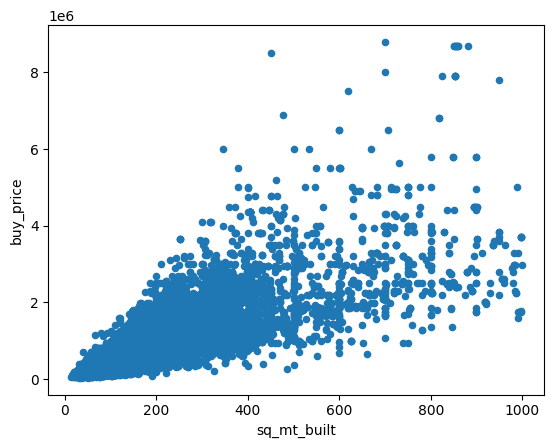

In [2]:
df = pd.read_csv("houses_Madrid.csv")
print(f"The lenght {len(df.index)}")
print(f"The columns of the database {df.columns}")
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
df = df[["sq_mt_built", "buy_price"]].fillna(False)
## FIXME: add here the creation of the training data and test data

df_shuffled = df.sample(frac=1) # shuffle the rows

In [3]:
x = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

In [4]:
training_data_y

array([345000., 430000., 121000., ..., 254000., 749000., 114000.])

## P1: Loss function (10 pts)
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected. 
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there. 

In [5]:
# TODO: implement the loss function here using Python math ops and sklearn
def loss_RMSE(y, yhat):
    return np.sqrt(np.mean((y - yhat) ** 2))

from sklearn.metrics import mean_squared_error

def loss_RMSE_sk(y, yhat):
    return np.sqrt(mean_squared_error(y, yhat))

In [6]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn 
# Compare their outputs.

# Example Predictions.
yhat_example = np.random.normal(loc=np.mean(training_data_y), scale=np.std(training_data_y), size=len(training_data_y))

# Experiment 1: RMSE using my Python Func.
rmse_custom = loss_RMSE(training_data_y, yhat_example)
print(f"My RMSE: {rmse_custom}")

# Experiment 2: RMSE using skLearn Func.
rmse_sk = loss_RMSE_sk(training_data_y, yhat_example)
print(f"Sklearn RMSE: {rmse_sk}")

# Check if same output.
print(f"RMSE comparison (if they are close): {np.isclose(rmse_custom, rmse_sk)}")

My RMSE: 1096789.178548392
Sklearn RMSE: 1096789.178548392
RMSE comparison (if they are close): True


## P2: Implement a linear predictor (10 pts)
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [7]:
# TODO: implement the predictor function here

def predict(x, theta):
    # theta[0] is the intercept (theta_0), theta[1] is the slope (theta_1)
    # Based on the Linear Model from Class.
    y_hat = theta[1] * x + theta[0]
    return y_hat


In [8]:
# TODO: Now, run some experiments with it

# Example Theta Vals.
theta_example = [50000, 3000]  # theta_0 = 50,000 (intercept), theta_1 = 3,000 (slope)

# Use Predict Func w/ Test Data.
y_hat_example = predict(training_data_x, theta_example)

# Show First Few vals for Predicted & Actual.
print(f"Predicted values (first 5): {y_hat_example[:5]}")
print(f"Actual values (first 5): {training_data_y[:5]}")

# Calculate the RMSE between Predicted & Actual.
rmse_custom_example = loss_RMSE(training_data_y, y_hat_example)
rmse_sk_example = loss_RMSE_sk(training_data_y, y_hat_example)

# Output RMSEs.
print(f"RMSE (my implementation): {rmse_custom_example}")
print(f"RMSE (sklearn implementation): {rmse_sk_example}")


Predicted values (first 5): [371000. 347000. 260000. 272000.  50000.]
Actual values (first 5): [ 345000.  430000.  121000.  445000. 2700000.]
RMSE (my implementation): 564079.1314197126
RMSE (sklearn implementation): 564079.1314197126


## P3: Implement a "grid search" function (20 pts)
Implement a function grid_search() which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values. 
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0] 

In [9]:
# TODO: implement the grid search function here 
import time

def grid_search(training_data_x, training_data_y, grid0, grid1):
    best_theta = [0, 0]

    # Start w/ large Val.
    best_rmse = float('inf')  
    start_time = time.time()

    # Loop Over All Combos of Grid0 and Grid1.
    for theta_0 in grid0:
        for theta_1 in grid1:
            theta = [theta_0, theta_1]
            # Predict w/ Cur Theta.
            y_hat = predict(training_data_x, theta)
            # Calculate RMSE on Training Data.
            rmse = loss_RMSE(training_data_y, y_hat)
            
            # If this RMSE is better than cur best, Update Vals for RMSE and theta's best.
            if rmse < best_rmse:
                best_rmse = rmse
                best_theta = theta

    end_time = time.time()
    print(f"Grid search took {end_time - start_time:.2f} seconds")
    
    return best_theta, best_rmse


In [10]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

# Define some Grid Values for theta0 and theta1.
grid0 = np.linspace(0, 100000, 5)  # Possible Vals for theta0.
grid1 = np.linspace(1000, 5000, 5)  # Possible Vals for theta1.

# Run Grid Search on Training Data.
best_theta, best_rmse = grid_search(training_data_x, training_data_y, grid0, grid1)

# Print the best Theta and RMSE.
print(f"Best theta found: {best_theta}")
print(f"Best RMSE on training data: {best_rmse}")

# Test Best Data on Data Set.
y_hat_test = predict(test_data_x, best_theta)

# Calculate RMSE on Test Set.
test_rmse = loss_RMSE(test_data_y, y_hat_test)
print(f"RMSE on test data: {test_rmse}")


Grid search took 0.00 seconds
Best theta found: [np.float64(75000.0), np.float64(4000.0)]
Best RMSE on training data: 509206.3712214012
RMSE on test data: 513349.90222922305


In [11]:
# TODO: repeat the experimentation from above with different grids. 
# Finally, print the grid that provides the best value while still running faster 
# than 10 seconds.

# Experiment 1: Using a Bigger Grid.
grid0_exp1 = np.linspace(0, 100000, 10)
grid1_exp1 = np.linspace(1000, 5000, 10)
best_theta_exp1, best_rmse_exp1 = grid_search(training_data_x, training_data_y, grid0_exp1, grid1_exp1)
print(f"Exp1 - Best theta: {best_theta_exp1}, Best RMSE: {best_rmse_exp1}")

# Experiment 2: Using a Smaller Grid.
grid0_exp2 = np.linspace(0, 100000, 3)
grid1_exp2 = np.linspace(1000, 5000, 3)
best_theta_exp2, best_rmse_exp2 = grid_search(training_data_x, training_data_y, grid0_exp2, grid1_exp2)
print(f"Exp2 - Best theta: {best_theta_exp2}, Best RMSE: {best_rmse_exp2}")

# Print Grid w/ Best Value while Faster than 10 Seconds.

if best_rmse_exp1 < best_rmse_exp2:
    print(f"Best Grid : Exp1 w/ size 10x10.")
    print(f"Best theta: {best_theta_exp1}, RMSE: {best_rmse_exp1}")
    print(f"Grid0: {grid0_exp1}")
    print(f"Grid1: {grid1_exp1}")
else:
    print(f"Best Grid : Exp2 w/ size 3x3.")
    print(f"Best theta: {best_theta_exp2}, RMSE: {best_rmse_exp2}")
    print(f"Grid0: {grid0_exp2}")
    print(f"Grid1: {grid1_exp2}")

Grid search took 0.00 seconds
Exp1 - Best theta: [np.float64(0.0), np.float64(4555.555555555556)], Best RMSE: 507364.9045799859
Grid search took 0.00 seconds
Exp2 - Best theta: [np.float64(0.0), np.float64(5000.0)], Best RMSE: 519226.4518196443
Best Grid : Exp1 w/ size 10x10.
Best theta: [np.float64(0.0), np.float64(4555.555555555556)], RMSE: 507364.9045799859
Grid0: [     0.          11111.11111111  22222.22222222  33333.33333333
  44444.44444444  55555.55555556  66666.66666667  77777.77777778
  88888.88888889 100000.        ]
Grid1: [1000.         1444.44444444 1888.88888889 2333.33333333 2777.77777778
 3222.22222222 3666.66666667 4111.11111111 4555.55555556 5000.        ]


## P4: Implement a random search function (20 pts)
Implement a function that returns the estimate for the best $\theta$ by trying out random 
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [12]:
# TODO: implement the random search function here 
import random

def random_search(training_data_x, training_data_y, trials, theta_0_range, theta_1_range):
    best_theta = [0, 0]
    # Start w/ Large Val.
    best_rmse = float('inf')  
    start_time = time.time()

    # Perform Trials.
    for _ in range(trials):
        # Randomly generate theta0 and theta1.
        theta_0 = random.uniform(theta_0_range[0], theta_0_range[1])
        theta_1 = random.uniform(theta_1_range[0], theta_1_range[1])
        theta = [theta_0, theta_1]

        # Predict using Random Theta.
        y_hat = predict(training_data_x, theta)
        # Calculate RMSE on Training Data.
        rmse = loss_RMSE(training_data_y, y_hat)

        # If this RMSE is better than cur best, Update Vals for RMSE and theta's best.
        if rmse < best_rmse:
            best_rmse = rmse
            best_theta = theta

    end_time = time.time()
    print(f"Random Search took {end_time - start_time:.2f} seconds")
    
    return best_theta, best_rmse


In [13]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set. 
# Print the loss on the data set and the test set. Measure and print how long the training takes.

# Set up the Range for Theta0 and Theta0.
theta_0_range = [0, 100000]  # Range for intercept (theta_0)
theta_1_range = [1000, 5000]  # Range for slope (theta_1)

# Choose # of Trials.
trials = 1000

# Run Random Search on Training Data.
best_theta_random, best_rmse_random = random_search(training_data_x, training_data_y, trials, theta_0_range, theta_1_range)

# Print the Best Theta and RMSE.
print(f"Random Search - Best theta: {best_theta_random}")
print(f"Random Search - Best RMSE on training data: {best_rmse_random}")

# Now test Best Theta.
y_hat_test_random = predict(test_data_x, best_theta_random)

# Calculate RMSE on the Test Set.
test_rmse_random = loss_RMSE(test_data_y, y_hat_test_random)
print(f"Random Search - RMSE on test data: {test_rmse_random}")

Random Search took 0.03 seconds
Random Search - Best theta: [20230.014906870885, 4337.242585003939]
Random Search - Best RMSE on training data: 506685.45476328384
Random Search - RMSE on test data: 508175.1809010439


## P5: Using the sklearn library (40 pts)

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed. 

In [14]:
# TODO: Implement here

from sklearn.linear_model import LinearRegression
import time

# Reshape for Sklearn's Input.
training_data_x_reshaped = training_data_x.reshape(-1, 1)
test_data_x_reshaped = test_data_x.reshape(-1, 1)

# Initialize LinearRegression Model.
model = LinearRegression()

# Take Start Time.
start_time = time.time()

# Fit Model on Training Data.
model.fit(training_data_x_reshaped, training_data_y)

# Take End Time.
end_time = time.time()

# Print Time it took to Run.
print(f"Training with sklearn took {end_time - start_time:.4f} seconds")

# Get the learned parameters.
theta_0_sklearn = model.intercept_  # Intercept - Theta0
theta_1_sklearn = model.coef_[0]    # Slope - Theta1
print(f"Sklearn - theta_0 (intercept): {theta_0_sklearn}, theta_1 (slope): {theta_1_sklearn}")

# Make Predictions on Training Data.
y_hat_sklearn_train = model.predict(training_data_x_reshaped)

# Calculate RMSE for Training Data.
rmse_sklearn_train = loss_RMSE(training_data_y, y_hat_sklearn_train)
print(f"Sklearn - RMSE on training data: {rmse_sklearn_train}")

# Make Predictin on Test Data.
y_hat_sklearn_test = model.predict(test_data_x_reshaped)

# Calculate RMSE for Test Data.
rmse_sklearn_test = loss_RMSE(test_data_y, y_hat_sklearn_test)
print(f"Sklearn - RMSE on test data: {rmse_sklearn_test}")


Training with sklearn took 0.0045 seconds
Sklearn - theta_0 (intercept): 14264.575256814715, theta_1 (slope): 4376.688161556261
Sklearn - RMSE on training data: 506657.750635079
Sklearn - RMSE on test data: 507833.685357335


In [15]:
# TODO: Run performance experiments here. 

# Comparing All Methods.

# Compare the Parameters Found.
print("Comparison of theta values:")
print(f"Sklearn - theta_0: {theta_0_sklearn}, theta_1: {theta_1_sklearn}")
print(f"Grid Search - Best theta: {best_theta_exp1}")
print(f"Random Search - Best theta: {best_theta_random}")

# Compare the RMSE on the Training and Test Sets.
print("\nComparison of RMSE values:")
print(f"Sklearn - RMSE on training data: {rmse_sklearn_train}, RMSE on test data: {rmse_sklearn_test}")
print(f"Grid Search - RMSE on training data: {best_rmse_exp1}")
print(f"Random Search - RMSE on training data: {best_rmse_random}")


Comparison of theta values:
Sklearn - theta_0: 14264.575256814715, theta_1: 4376.688161556261
Grid Search - Best theta: [np.float64(0.0), np.float64(4555.555555555556)]
Random Search - Best theta: [20230.014906870885, 4337.242585003939]

Comparison of RMSE values:
Sklearn - RMSE on training data: 506657.750635079, RMSE on test data: 507833.685357335
Grid Search - RMSE on training data: 507364.9045799859
Random Search - RMSE on training data: 506685.45476328384


TODO: discuss the performance of the sklearn library implementation, compared to what you implemented.

### My Results Comparison (Grid Search, Random Search, Sklearn):

- **Grid Search**: This is the simplest method, but it's really just brute force. You can adjust the grid for better results, but the more exact you make it, the slower it gets. It's not always efficient for larger grids too.
  
- **Random Search**: This method produced results very close to Sklearn’s, specifically with the test data. It’s faster than Grid Search and usually gives better results, but since it’s based on randomness, the outcomes aren’t really guaranteed.

- **Sklearn’s Linear Regression**: This was the most accurate method, with the lowest RMSE on the training data. It was also the fastest. Overall, Sklearn’s approach is definitely the best choice for both speed and accuracy.

### Potential Improvements:

- **Using More Features**: Adding new features, like polynomial terms, could help improve predictions.

- **Using Cross-validation**: This would give a good idea of how the model performs on unseen data.

- **Trying Other Models**: Using models like decision trees or random forests might improve performance assuming same data.
